# Vanishing Gradient Problem & Its Solution

### Importing Libraries

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### Creating Data 

In [49]:
X,y = make_moons(n_samples=250, noise=0.05, random_state=42)

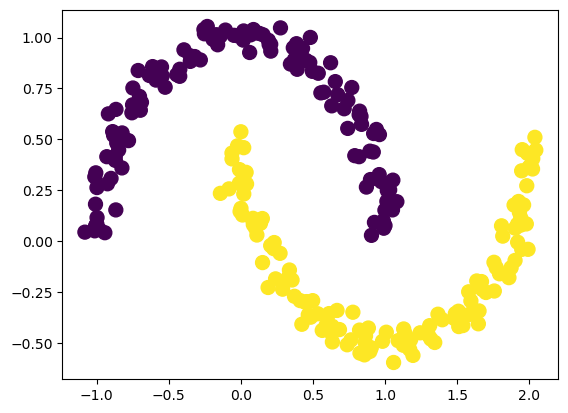

In [50]:
plt.scatter(X[:,0],X[:,1], c=y, s=100)
plt.show()

### Creating Model

In [51]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [52]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
model.get_weights()[0]  # Randomly initalize weigts 

array([[ 0.49003857, -0.11510998, -0.64471024, -0.40583116,  0.51253563,
        -0.39125896, -0.5378912 , -0.34424752,  0.36520904,  0.2744547 ],
       [ 0.5994968 , -0.08811134,  0.44816667, -0.50180036, -0.64002246,
        -0.56289613,  0.42583805,  0.5520089 , -0.45102724,  0.68928736]],
      dtype=float32)

In [54]:
# Storing weights in old_weights Varible  
old_weights = model.get_weights()[0]     ## Weight of first layer

### Dividing Dataset into Train & test

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [56]:
model.fit(X_train, y_train, epochs = 100,verbose = 0)

In [67]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print the loss and accuracy
print("Loss:- ",loss*100)
print(f"Accuracy: {accuracy*100}")

Loss:-  69.31901574134827
Accuracy: 46.00000083446503


```python
After 100 Epoch Loss is still 69% 
So this situation is comes under Vanishing Gradient
```

In [57]:
# Weights After Training model for 100 epochs 
new_weights = model.get_weights()[0]   # Weights of 1st Layer 
new_weights

array([[ 0.5111841 , -0.18522726, -0.5886312 , -0.3689499 ,  0.53099096,
        -0.4162482 , -0.56583613, -0.41243002,  0.34411564,  0.3089857 ],
       [ 0.5824624 , -0.03265268,  0.39563382, -0.53135234, -0.65606064,
        -0.543424  ,  0.45048383,  0.6078807 , -0.4339702 ,  0.6634117 ]],
      dtype=float32)

### Learning Parameter 

In [58]:
model.optimizer.get_config()["learning_rate"]

0.0010000000474974513

In [59]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [60]:
gradient

array([[-21.145521,  70.11728 , -56.07903 , -36.881268, -18.455326,
         24.989246,  27.944921,  68.182495,  21.093397, -34.530994],
       [ 17.03441 , -55.458664,  52.53285 ,  29.551981,  16.03818 ,
        -19.472122, -24.645775, -55.87178 , -17.05703 ,  25.875687]],
      dtype=float32)

### Percentage change in weights after Training 

In [63]:
percent_change

array([[ 4.315073 , 60.913292 ,  8.698331 ,  9.087835 ,  3.600789 ,
         6.386882 ,  5.195274 , 19.806242 ,  5.775705 , 12.581674 ],
       [ 2.8414516, 62.941574 , 11.721723 ,  5.889191 ,  2.5058775,
         3.4592745,  5.787594 , 10.121536 ,  3.7818184,  3.7539768]],
      dtype=float32)

In [64]:
old_weights

array([[ 0.49003857, -0.11510998, -0.64471024, -0.40583116,  0.51253563,
        -0.39125896, -0.5378912 , -0.34424752,  0.36520904,  0.2744547 ],
       [ 0.5994968 , -0.08811134,  0.44816667, -0.50180036, -0.64002246,
        -0.56289613,  0.42583805,  0.5520089 , -0.45102724,  0.68928736]],
      dtype=float32)

In [66]:
new_weights
# After 100 epochs their in minute change in the value of weights

array([[ 0.5111841 , -0.18522726, -0.5886312 , -0.3689499 ,  0.53099096,
        -0.4162482 , -0.56583613, -0.41243002,  0.34411564,  0.3089857 ],
       [ 0.5824624 , -0.03265268,  0.39563382, -0.53135234, -0.65606064,
        -0.543424  ,  0.45048383,  0.6078807 , -0.4339702 ,  0.6634117 ]],
      dtype=float32)

#### After 100 epochs loss is still 69% it after a point convergence is stop, This is situation of 
#### of Vanishing Gradient

### Vanishing Gradient problem can be resolve by two methods:- 
#### 1. Reducing_model _complexity
#### 2. Use of Relu as Activation function

# 1.Reducing_model _complexity for reducing vanishing gradient

Later we were using 10 Hidden layer to avoid Vanishing gradient problem we reduce these **Hidden Layer** to 2.
```python
model = Sequential()
model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
```

### Craeting model

In [68]:
model = Sequential()
model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

### Model Compiling

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [70]:
model.get_weights()[0]  # Randomly initalize weigts 

array([[ 0.10735255,  0.44233197,  0.34066123, -0.26685157,  0.16011286,
        -0.05528706,  0.0970003 ,  0.03912508, -0.13235122, -0.0497272 ],
       [-0.55298555, -0.6656139 ,  0.35482806, -0.38783142, -0.24388814,
        -0.28935158, -0.19922715, -0.4102537 ,  0.45381182,  0.18496901]],
      dtype=float32)

In [71]:
# Storing weights in old_weights Varible  
old_weights = model.get_weights()[0]     ## Weight of first layer

### Model Training 

In [72]:
model.fit(X_train, y_train, epochs = 100,verbose = 0)

In [73]:
# Evaluate the model on the test data
Red_Com_loss, Red_com_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print the loss and accuracy
print("Loss:- ",Red_Com_loss*100)
print(f"Accuracy: {Red_com_accuracy*100}")


Loss:-  33.65389108657837
Accuracy: 86.00000143051147


### Weights After Training model for 100 epochs 

In [120]:
new_weights = model.get_weights()[0]   # Weights of 1st Layer 
new_weights

array([[ 0.5782906 , -0.24670519, -0.6148037 ,  0.32471436, -0.2510734 ,
         0.36921796, -0.3237105 , -0.18326887, -0.80283797, -0.45628873],
       [-0.49227867,  0.52940965, -0.4351359 , -0.86259174, -0.32282376,
        -0.7345098 ,  0.20895492, -0.25205594, -0.34271285,  0.13142778]],
      dtype=float32)

### Learning rate 

In [75]:
model.optimizer.get_config()["learning_rate"]

0.0010000000474974513

In [76]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [77]:
gradient

array([[ -623.3941 ,  -634.8595 ,   728.81445,  -687.6994 ,  -679.3805 ,
         -702.41614,  -565.20514,  -622.576  ,   182.32077,   700.6062 ],
       [  973.3197 ,  1138.7057 , -1022.3672 ,   944.4093 ,  1055.5898 ,
         1023.2871 ,   878.6558 ,   942.7811 ,  -498.70172, -1074.9923 ]],
      dtype=float32)

### Percentage change in weights after Training 

In [79]:
percent_change

array([[ 580.698  ,  143.52557,  213.94113,  257.7086 ,  424.31357,
        1270.4891 ,  582.6839 , 1591.2451 ,  137.75526, 1408.8994 ],
       [ 176.0118 ,  171.07602,  288.13034,  243.51027,  432.81723,
         353.64838,  441.03217,  229.80441,  109.89175,  581.1744 ]],
      dtype=float32)

In [80]:
old_weights

array([[ 0.10735255,  0.44233197,  0.34066123, -0.26685157,  0.16011286,
        -0.05528706,  0.0970003 ,  0.03912508, -0.13235122, -0.0497272 ],
       [-0.55298555, -0.6656139 ,  0.35482806, -0.38783142, -0.24388814,
        -0.28935158, -0.19922715, -0.4102537 ,  0.45381182,  0.18496901]],
      dtype=float32)

In [81]:
new_weights
# After 100 epochs their in minute change in the value of weights

array([[ 0.7307467 ,  1.0771915 , -0.38815328,  0.4208479 ,  0.8394934 ,
         0.6471291 ,  0.66220546,  0.6617011 , -0.314672  , -0.7503334 ],
       [-1.5263053 , -1.8043196 ,  1.3771954 , -1.3322408 , -1.299478  ,
        -1.3126388 , -1.077883  , -1.3530349 ,  0.9525136 ,  1.2599614 ]],
      dtype=float32)

### Comparsion between loss & Accuracy with Vanishing Gradient problen & after reducing complexity

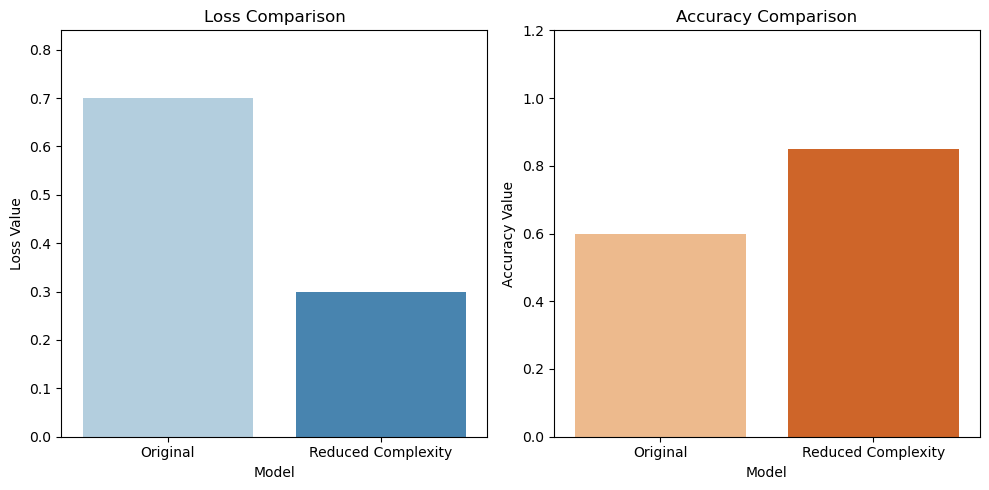

In [121]:
# Create separate DataFrames for Loss and Accuracy
data_loss = {
    'Model': ['Original', 'Reduced Complexity'],
    'Loss': [loss, Red_Com_loss]
}

data_accuracy = {
    'Model': ['Original', 'Reduced Complexity'],
    'Accuracy': [accuracy, Red_Com_accuracy]
}

df_loss = pd.DataFrame(data_loss)
df_accuracy = pd.DataFrame(data_accuracy)
# Plot Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x='Model', y='Loss', data=df_loss, palette='Blues')
plt.title('Loss Comparison')
plt.ylabel('Loss Value')
plt.ylim(0, max(loss, Red_Com_loss) * 1.2)  # Adjusting the y-axis limit for better visualization

# Plot Accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(x='Model', y='Accuracy', data=df_accuracy, palette='Oranges')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy Value')
plt.ylim(0, 1.2)  # Assuming accuracy is a percentage (0-1 scale)

# Adjust layout
plt.tight_layout()
plt.show()

# 2. Use of Relu as Activation function

### Model Creation

In [101]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Model Compiling

In [102]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [103]:
model.get_weights()[0]

array([[ 0.533493  , -0.41584894, -0.4843371 ,  0.26914185, -0.21178994,
         0.35248286, -0.41026232, -0.07253492, -0.69190556, -0.40029272],
       [-0.34950003,  0.4130625 , -0.5894252 , -0.70241886, -0.31430438,
        -0.5749655 ,  0.05236578, -0.12098104, -0.44404015,  0.07392049]],
      dtype=float32)

In [104]:
old_weights = model.get_weights()[0]

### Model Training

In [118]:
model.fit(X_train, y_train, epochs = 100,verbose = 0)

### Loss & Accuracy of model

In [107]:
# Evaluate the model on the test data
Relu_loss, Relu_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print the loss and accuracy
print("Loss:- ",Relu_loss*100)
print(f"Accuracy: {Relu_accuracy*100}")


Loss:-  0.009465354378335178
Accuracy: 100.0


In [108]:
new_weights = model.get_weights()[0]

In [109]:
model.optimizer.get_config()["learning_rate"]

0.0010000000474974513

In [110]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [111]:
gradient

array([[ -40.54606 , -169.37628 ,  127.80034 ,  -54.319798,   39.35957 ,
         -15.246718,  -89.210175,  108.93972 ,  107.87469 ,   53.103355],
       [ 147.99097 , -115.9929  , -145.4704  ,  162.02217 ,    8.461475,
         162.18065 , -154.98842 ,  135.2857  ,  -96.74387 ,  -56.229336]],
      dtype=float32)

In [112]:
percent_change

array([[  7.600111 ,  40.73024  ,  26.386654 ,  20.182592 ,  18.58425  ,
          4.325521 ,  21.744669 , 150.18935  ,  15.590956 ,  13.26613  ],
       [ 42.34362  ,  28.0812   ,  24.680046 ,  23.066319 ,   2.6921277,
         28.207027 , 295.97272  , 111.82389  ,  21.787191 ,  76.06733  ]],
      dtype=float32)

In [113]:
old_weights

array([[ 0.533493  , -0.41584894, -0.4843371 ,  0.26914185, -0.21178994,
         0.35248286, -0.41026232, -0.07253492, -0.69190556, -0.40029272],
       [-0.34950003,  0.4130625 , -0.5894252 , -0.70241886, -0.31430438,
        -0.5749655 ,  0.05236578, -0.12098104, -0.44404015,  0.07392049]],
      dtype=float32)

In [114]:
new_weights

array([[ 0.57403904, -0.24647266, -0.61213744,  0.32346165, -0.2511495 ,
         0.36772957, -0.32105213, -0.18147464, -0.79978025, -0.45339608],
       [-0.497491  ,  0.5290554 , -0.4439548 , -0.86444104, -0.32276586,
        -0.73714614,  0.2073542 , -0.25626674, -0.34729627,  0.13014983]],
      dtype=float32)

### Comparsion between loss & Accuracy with Vanishing Gradient problen & after reducing complexity & After Using Relu

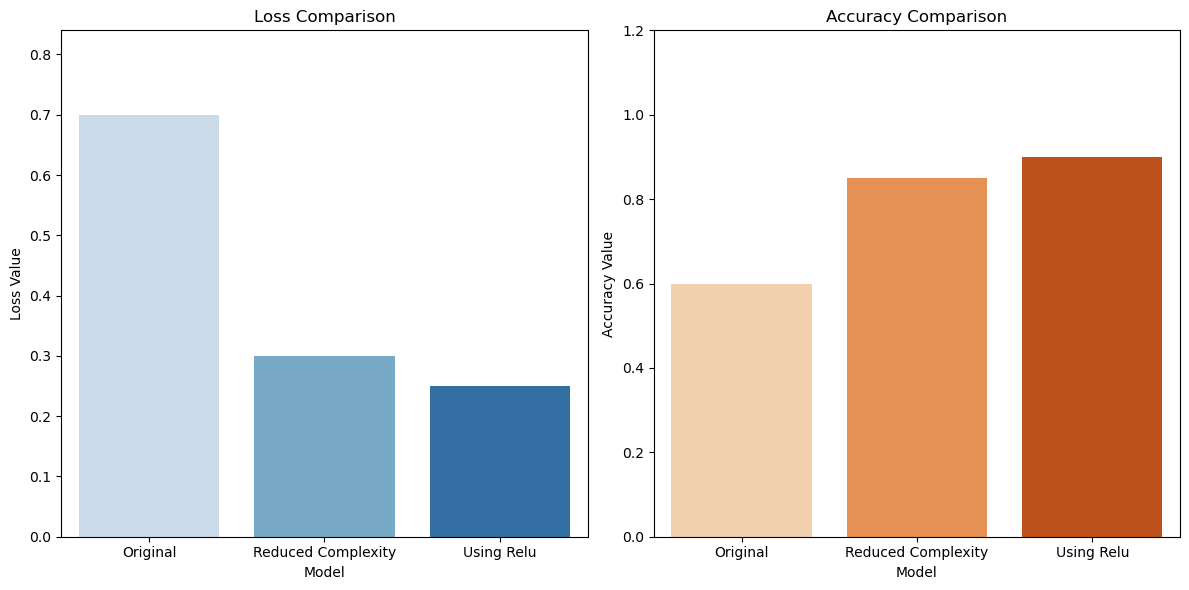

In [117]:
data_loss = {
    'Model': ['Original', 'Reduced Complexity', 'Using Relu'],
    'Loss': [loss, Red_Com_loss, Relu_loss]
}

data_accuracy = {
    'Model': ['Original', 'Reduced Complexity', 'Using Relu'],
    'Accuracy': [accuracy, Red_Com_accuracy, Relu_accuracy]
}

df_loss = pd.DataFrame(data_loss)
df_accuracy = pd.DataFrame(data_accuracy)

# Plot Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x='Model', y='Loss', data=df_loss, palette='Blues')
plt.title('Loss Comparison')
plt.ylabel('Loss Value')
plt.ylim(0, max(loss, Red_Com_loss, Relu_loss) * 1.2)  # Adjusting the y-axis limit for better visualization

# Plot Accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(x='Model', y='Accuracy', data=df_accuracy, palette='Oranges')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy Value')
plt.ylim(0, 1.2)  # Assuming accuracy is a percentage (0-1 scale)

# Adjust layout
plt.tight_layout()
plt.show()
